In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import os
import neurokit2 as nk

C:\Users\PC PAL\AppData\Local\Temp\ipykernel_16036\3394975354.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# plot the ecg_signal

data_dir = 'Data/Signals'

def original_ecg_signal(data_dir , file_path):
    signal_csv_path = os.path.join(data_dir, file_path)
    signal_df = pd.read_csv(signal_csv_path)

    max_time = 2
    signal_df  = signal_df[signal_df['time'] < max_time]

    plt.figure(figsize=(10, 6))

    # Plot each signal column except 'time'
    for column in signal_df.columns:
        if column != 'time':
            plt.plot(signal_df['time'], signal_df[column], label=column)

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('{} ECG Signal'.format(file_path.split('_')[0]))
    plt.legend()
    plt.show()

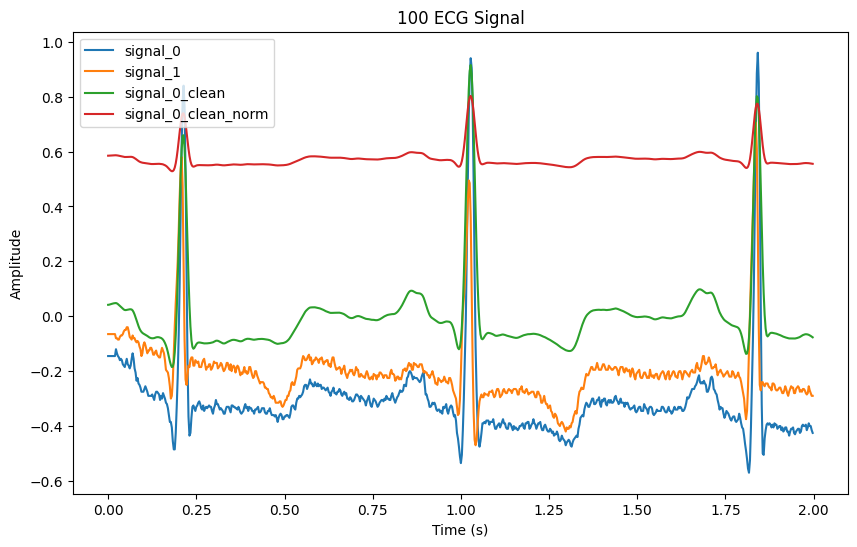

In [3]:
original_ecg_signal(data_dir, "100_signal.csv")

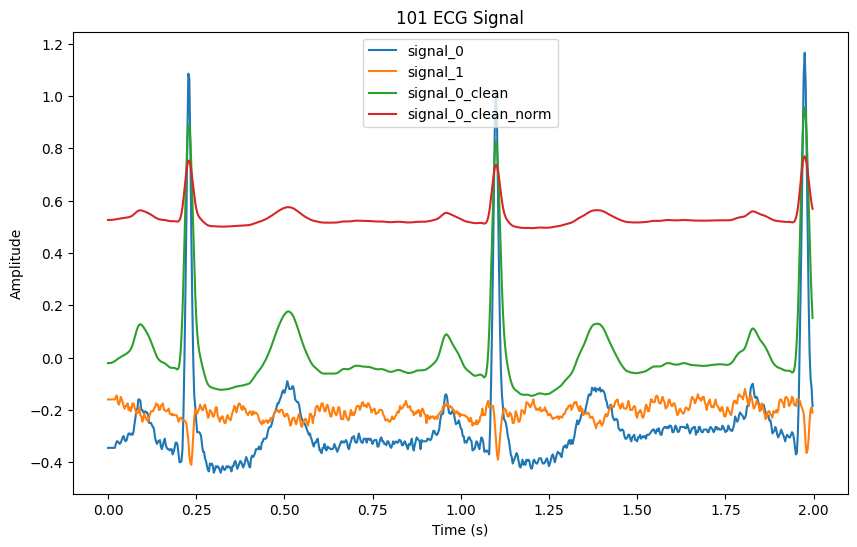

In [4]:
original_ecg_signal(data_dir, "101_signal.csv")

In [5]:
record_names =  [f'{i:03d}' for i in range(100, 235)]
existing_records = [i for i in record_names if f'{i}_signal.csv' in os.listdir(data_dir)]

In [6]:
def all_ecg_signal(ax, data_dir, file_path):
    signal_csv_path = os.path.join(data_dir, file_path)
    signal_df = pd.read_csv(signal_csv_path)

    max_time = 2
    signal_df = signal_df[signal_df['time'] < max_time]

    for column in signal_df.columns:
        if column != 'time':
            ax.plot(signal_df['time'], signal_df[column], label=column)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    ax.set_title('{} ECG Signal'.format(file_path.split('_')[0]))
    ax.legend()

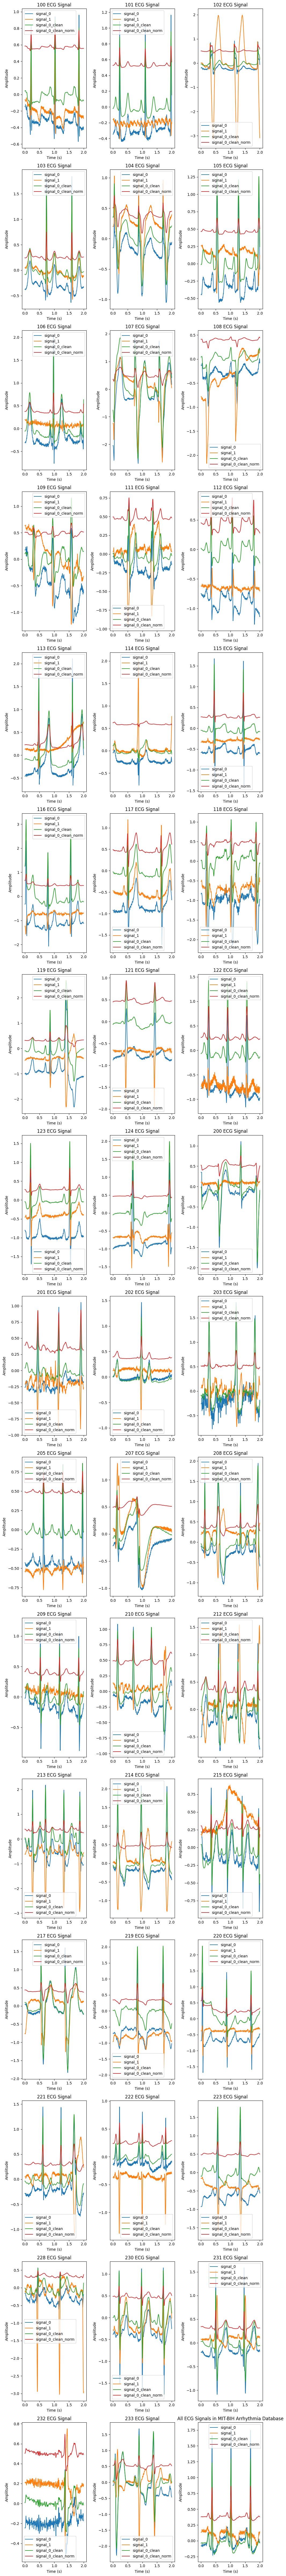

In [7]:
num_rows = (len(existing_records) + 2) // 3
fig, axs = plt.subplots(num_rows, 3, figsize=(10, 6 * num_rows))

for i, record_name in enumerate(existing_records):
    row_idx = i // 3
    col_idx = i % 3

    all_ecg_signal(axs[row_idx, col_idx], data_dir, f'{record_name}_signal.csv')

plt.title("All ECG Signals in MIT-BIH Arrhythmia Database")
plt.tight_layout()
plt.show()

Discrete Wavelet Transform(DWT). 
*It's a mathematical tool used for analyzing signals in both the time and frequency domains

In [8]:
def plot_single_ecg_signal(data_dir, file_path):
    signal_csv_path = os.path.join(data_dir, file_path)
    signal_df = pd.read_csv(signal_csv_path)
    

    max_time = 4
    signal_df = signal_df[signal_df['time'] < max_time]

    ecg_signal = signal_df['signal_0'].values
    ecg_time = signal_df['time'].values

    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=360)
    _, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=360)
    _, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=360, method="dwt")
    print(waves_peak)
  
    plt.figure(figsize=(10, 6))
    plt.plot(ecg_time, ecg_signal, label='Original Signal')
    plt.plot(ecg_time, ecg_cleaned, label='Cleaned Signal', linestyle='--')

    # Plot R-peaks
    plt.scatter(ecg_time[rpeaks['ECG_R_Peaks']], ecg_cleaned[rpeaks['ECG_R_Peaks']], color='red', label='R-peaks')

    
    print(waves_peak)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('{} ECG Signal'.format(file_path.split('_')[0]))
    plt.legend()
    plt.grid(True)
    plt.show()


{'ECG_P_Peaks': [309, 604, 884, 1168], 'ECG_P_Onsets': [294, 586, 864, 1142], 'ECG_P_Offsets': [338, 610, 891, 1203], 'ECG_Q_Peaks': [358, 651, 935, nan], 'ECG_R_Onsets': [350, 644, 925, nan], 'ECG_R_Offsets': [387, 677, 961, 1246], 'ECG_S_Peaks': [471, 756, 957, nan], 'ECG_T_Peaks': [433, 712, 1065, 1259], 'ECG_T_Onsets': [418, 703, 1045, 1249], 'ECG_T_Offsets': [468, 721, 1070, 1269]}
{'ECG_P_Peaks': [309, 604, 884, 1168], 'ECG_P_Onsets': [294, 586, 864, 1142], 'ECG_P_Offsets': [338, 610, 891, 1203], 'ECG_Q_Peaks': [358, 651, 935, nan], 'ECG_R_Onsets': [350, 644, 925, nan], 'ECG_R_Offsets': [387, 677, 961, 1246], 'ECG_S_Peaks': [471, 756, 957, nan], 'ECG_T_Peaks': [433, 712, 1065, 1259], 'ECG_T_Onsets': [418, 703, 1045, 1249], 'ECG_T_Offsets': [468, 721, 1070, 1269]}


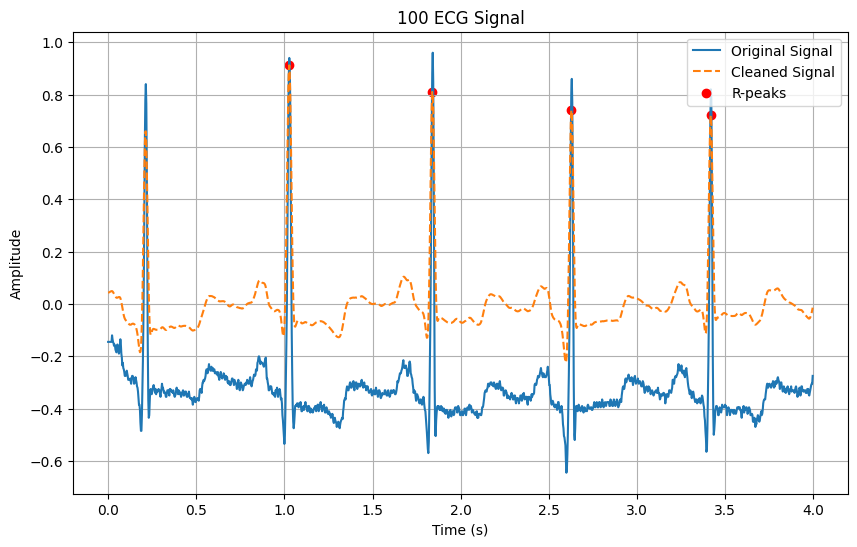

In [9]:
data_dir = 'Data/Signals'
file_path = '100_signal.csv'
plot_single_ecg_signal(data_dir, file_path)


In [10]:
signal_csv_path = os.path.join(data_dir, file_path)
signal_df = pd.read_csv(signal_csv_path)
    
max_time = 20
signal_df = signal_df[signal_df['time'] < max_time]

ecg_signal = signal_df['signal_0'].values
ecg_time = signal_df['time'].values

ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=360)

In [11]:
_, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=1000)

In [12]:
_, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=360, method="peak")

In [13]:
waves_peak

{'ECG_P_Peaks': [310,
  884,
  1464,
  1985,
  2339,
  2642,
  3223,
  3795,
  4114,
  4701,
  5285,
  5856,
  6462,
  nan],
 'ECG_Q_Peaks': [358,
  935,
  1504,
  2033,
  2390,
  2694,
  3272,
  3851,
  4158,
  4753,
  5335,
  5907,
  6515,
  nan],
 'ECG_S_Peaks': [471,
  957,
  1613,
  2080,
  2414,
  2716,
  3293,
  3958,
  4181,
  4864,
  5357,
  6013,
  6537,
  nan],
 'ECG_T_Peaks': [662,
  1231,
  1809,
  2339,
  2706,
  2997,
  3559,
  4170,
  4465,
  5060,
  5633,
  6214,
  6823,
  nan],
 'ECG_P_Onsets': [193,
  769,
  1338,
  1915,
  2322,
  2529,
  3105,
  3777,
  4083,
  4683,
  5262,
  5741,
  6440,
  nan],
 'ECG_T_Offsets': [676,
  1244,
  1822,
  2371,
  2719,
  3011,
  3573,
  4184,
  4479,
  5073,
  5647,
  6227,
  6837,
  nan]}

In [14]:
first_peaks = {}
for key, value in waves_peak.items():
    if value is not None and len(value) > 0:
        first_peaks[key] = [value[0]]

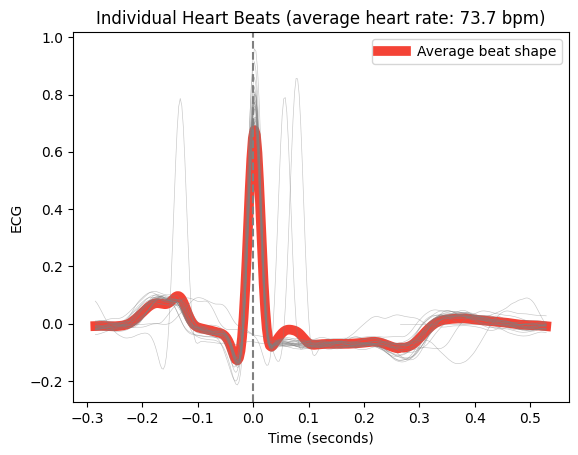

In [15]:
epochs = nk.ecg_segment(ecg_cleaned, rpeaks=None, sampling_rate=360, show=True)

In [16]:
def plot_single_ecg_signal(data_dir, file_path):
    signal_csv_path = os.path.join(data_dir, file_path)
    signal_df = pd.read_csv(signal_csv_path)
    
    max_time = 4
    signal_df = signal_df[signal_df['time'] < max_time]

    ecg_signal = signal_df['signal_0'].values
    ecg_time = signal_df['time'].values

    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=360)
    _, rpeaks = nk.ecg_peaks(ecg_cleaned, sampling_rate=360)

    _, waves_peak = nk.ecg_delineate(ecg_cleaned, rpeaks, sampling_rate=360, method="peak", show=True, show_type='peaks')

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('ECG Signal Peaks({})'.format(file_path.split('_')[0]))

    plt.figure(figsize=(10, 6))
    plt.plot(ecg_time, ecg_signal, label='Original Signal')
    plt.plot(ecg_time, ecg_cleaned, label='Cleaned Signal', linestyle='--')

    # Plot R-peaks
    plt.scatter(ecg_time[rpeaks['ECG_R_Peaks']], ecg_cleaned[rpeaks['ECG_R_Peaks']], color='red', label='R-peaks')


    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('{} ECG Signal with R peaks'.format(file_path.split('_')[0]))
    plt.legend()
    plt.grid(True)
    plt.show()


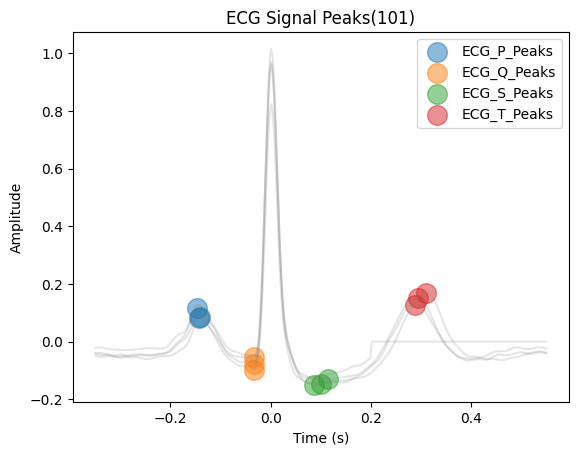

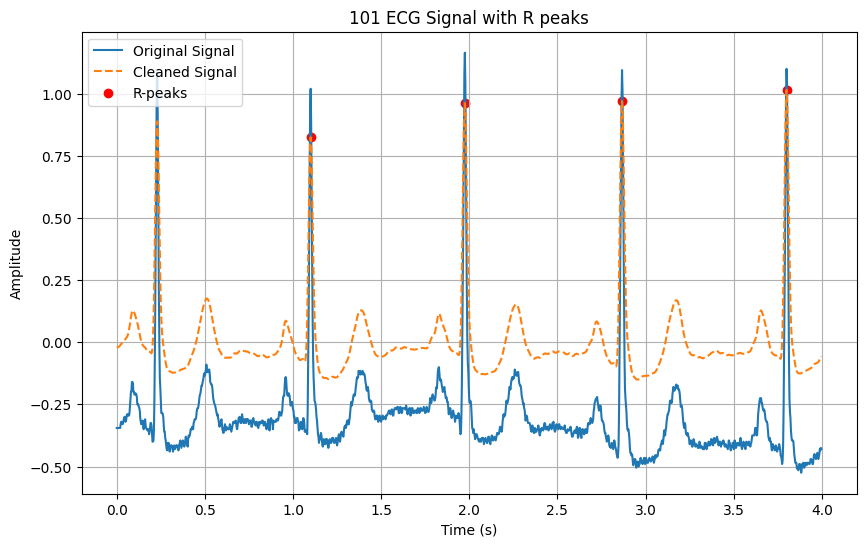

In [17]:
data_dir = 'Data/Signals'
file_path = '101_signal.csv'
plot_single_ecg_signal(data_dir, file_path)


# Cleaning

In [18]:
def ecg_clean(data_dir, file_path):
    signal_csv_path = os.path.join(data_dir, file_path)
    signal_df = pd.read_csv(signal_csv_path)
    
    ecg_signal = signal_df['signal_0'].values
    ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=360)
    
    signal_df['signal_0_clean'] = ecg_cleaned
    
    signal_df.to_csv(signal_csv_path, index=False)
    return signal_df

In [19]:
record_names =  [f'{i:03d}' for i in range(100, 235)]
existing_records = [i for i in record_names if f'{i}_signal.csv' in os.listdir(data_dir)]

In [20]:
for record_name in existing_records:
    file_path = f'{record_name}_signal.csv'
    ecg_clean(data_dir, file_path)

In [21]:
check = pd.read_csv('Data/Signals/100_signal.csv')

In [22]:
check.columns

Index(['signal_0', 'signal_1', 'time', 'signal_0_clean',
       'signal_0_clean_norm'],
      dtype='object')

# Normalizing

Min max scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
def normalize_ecg_signal(ecg_signal):
    scaler = MinMaxScaler()
    ecg_signal_normalized = scaler.fit_transform(ecg_signal.reshape(-1, 1))
    return ecg_signal_normalized.flatten()

In [25]:
def add_normalized_signal(data_dir, file_path):
    signal_csv_path = os.path.join(data_dir, file_path)
    signal_df = pd.read_csv(signal_csv_path)
    
    ecg_cleaned = signal_df['signal_0_clean'].values
    ecg_cleaned_norm = normalize_ecg_signal(ecg_cleaned)
    
    signal_df['signal_0_clean_norm'] = ecg_cleaned_norm
    signal_df.to_csv(signal_csv_path, index=False)
    return signal_df

In [26]:
for record_name in existing_records:
    file_path = f'{record_name}_signal.csv'
    add_normalized_signal(data_dir, file_path)

In [27]:
for record_name in existing_records:
    ecg_clean(data_dir, f'{record_name}_signal.csv')
    add_normalized_signal(data_dir, f'{record_name}_signal.csv')

In [28]:
def plot_original_and_normalized_ecg(data_dir, file_path):
    signal_csv_path = os.path.join(data_dir, file_path)
    signal_df = pd.read_csv(signal_csv_path)

    max_time = 2
    signal_df = signal_df[signal_df['time'] < max_time]

    ecg_signal = signal_df['signal_0'].values
    ecg_signal_cleaned = signal_df['signal_0_clean'].values
    ecg_signal_normalized = normalize_ecg_signal(ecg_signal_cleaned)

    plt.figure(figsize=(12, 6))

    # Plot original ECG signal
    plt.subplot(1, 2, 1)
    plt.plot(signal_df['time'], ecg_signal, label='Original ECG Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Original {}-ECG Signal'.format(file_path.split('_')[0]))
    plt.legend()

    # Plot cleaned , normalized ECG signal
    plt.subplot(1, 2, 2)
    plt.plot(signal_df['time'], ecg_signal_normalized, label='Cleaned Normalized ECG Signal', color='orange')
    plt.xlabel('Time (s)')
    plt.ylabel('Cleaned Normalized Amplitude')
    plt.title('Cleaned Normalized {}-ECG Signal.'.format(file_path.split('_')[0]))
    plt.legend()

    plt.tight_layout()
    plt.show()


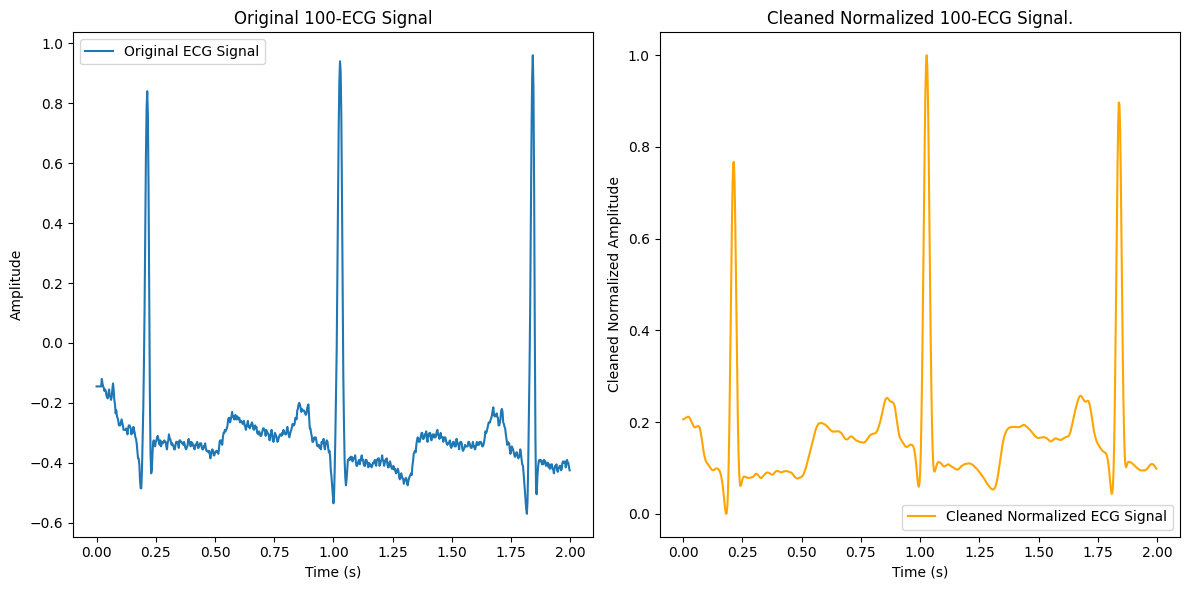

In [29]:

data_dir = 'Data/Signals'
file_path = '100_signal.csv'
plot_original_and_normalized_ecg(data_dir, file_path)

In [30]:
data_dir_signals = 'Data/Signals'
data_dir_annotations = 'Data/Annotations'

In [34]:
ecg_file_path = os.path.join(data_dir_signals, '100_signal.csv')
annotation_file_path = os.path.join(data_dir_annotations, '100_annotations.csv')

In [47]:
ecg_df = pd.read_csv(ecg_file_path)
annotation_df = pd.read_csv(annotation_file_path)

max_time = 15
ecg_df = ecg_df[ecg_df['time'] < max_time]
annotation_df = annotation_df[annotation_df['time'] < max_time]

In [48]:
ecg_clean = ecg_df['signal_0_clean_norm'].values
ecg_time = ecg_df['time'].values

In [49]:
annotations = annotation_df['annotation'].values
annotation_time = annotation_df['time'].values

In [50]:
#Find T waves and R peaks
_, rpeaks = nk.ecg_peaks(ecg_clean, sampling_rate=360)
_, waves_peak = nk.ecg_delineate(ecg_clean, rpeaks, sampling_rate=360, method="dwt")
t_peaks = waves_peak['ECG_T_Peaks']

In [51]:
# categorize hear beats
categories = {
    'N': ['N', 'L', 'R', 'e', 'j'],
    'S': ['A', 'a', 'J', 'S'],
    'V': ['V', 'E'],
    'F': ['F'],
    'Q': ['/', 'f', 'U']
}

In [52]:
def categorize_beat(annotation):
    for category, labels in categories.items():
        if annotation in labels:
            return category
    return 'Q'

In [53]:
annotation_df['category'] = annotation_df['annotation'].apply(categorize_beat)

In [54]:
annotation_df.head()

,time,annotation,category
0,0.050000,+,Q
1,0.213889,N,N
2,1.027778,N,N
3,1.838889,N,N
4,2.627778,N,N


In [ ]:
# split into heartbeats
